In [56]:
# fake news classifiwe using birectional LSTM RNN
import pandas as pd
df = pd.read_csv("fake-train.csv", engine='python', on_bad_lines='skip')

In [57]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [58]:
df.isnull().sum()

,0
id,0
title,565
author,1975
text,59
label,22


In [59]:
# get the independent features
df.shape

(20822, 5)

In [60]:
df=df.dropna()

In [61]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [62]:
# get independent featurs
X=df.drop('label',axis=1)

In [63]:
y=df['label']

In [64]:
# check data set balanced
y.value_counts()

,count
label,
0,10361
1,7922
как люди воспринимают своё положение.,1
чтобы это была дорога с двусторонним движением.,1


In [65]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [66]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [67]:
# vocab size
voc_size=5000

In [68]:
messages=X.copy()

In [69]:
import nltk
import re
from nltk.corpus import stopwords

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
# data preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'].iloc[i])  # remove non-letter characters
    review = review.lower()
    review = review.split()

    # Flatten list and stem each word
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [72]:
messages.reset_index(inplace=True)

In [73]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [74]:
voc_size=5000
onehot_rep=[one_hot(word,voc_size) for word in corpus]
print(onehot_rep)

[[2819, 2739, 262, 953, 1741, 4121, 3206, 1351, 2437, 588], [3380, 3796, 1691, 2194, 4773, 1898, 3394], [4791, 3917, 1449, 291], [2728, 650, 4191, 1224, 1685, 3423], [1191, 4773, 3834, 2808, 2812, 4292, 4773, 786, 3012, 2834], [4791, 3840, 59, 4605, 2934, 2381, 774, 153, 491, 2829, 4317, 4196, 3507, 200, 3394], [2749, 3973, 243, 4358, 1903, 3302, 3847, 3512, 2094, 273, 1337], [174, 2311, 4678, 437, 1644, 3131, 2381, 1404, 2094, 273, 1337], [4306, 1609, 2204, 3530, 1837, 2142, 4505, 2877, 2381, 1425], [807, 3155, 498, 1129, 4414, 1885, 2148, 1142], [4462, 2897, 1436, 1719, 286, 1132, 3329, 954, 4578, 3770, 2944], [1224, 4643, 1741, 2142, 2381, 1644], [2401, 1106, 2801, 1100, 4475, 3528, 4758, 50, 2293], [1056, 588, 1048, 2979, 666, 2813, 514, 2094, 273, 1337], [986, 262, 2416, 1999, 306, 2094, 273, 1337], [3851, 974, 204, 1652, 2141, 1517, 3088, 4536, 2783, 1498], [674, 388, 3796], [2650, 59, 4434, 2300, 2381, 1663, 3843, 3394], [412, 3568, 1691, 4513, 4158, 3575, 3477, 907, 4292], [325

In [75]:
# embedding Repensentation
sent_length=20
embedded_doc=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
embedded_doc

array([[   0,    0,    0, ..., 1351, 2437,  588],
       [   0,    0,    0, ..., 4773, 1898, 3394],
       [   0,    0,    0, ..., 3917, 1449,  291],
       ...,
       [   0,    0,    0, ..., 2094,  273, 1337],
       [   0,    0,    0, ..., 1178, 2881, 1133],
       [   0,    0,    0, ..., 2892,  374, 1047]], dtype=int32)

In [86]:
embedding_vector_feature=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
# model.add(LSTM(100)) ## LSTM
model.add(Dense(1,activation='sigmoid'))

model.build(input_shape=(None, sent_length))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 200)            │       112,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,001 (1.19 MB)

 Trainable params: 313,001 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

None


In [87]:
import numpy as np
X_final=np.array(embedded_doc)
y_final=np.array(y)

In [88]:
# test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final,y_final,test_size=0.33, random_state=42)

In [90]:

import numpy as np

# Convert labels to integers if they are strings like 'spam'/'ham' or 'yes'/'no'
# Example: Convert to 0 and 1
y_train = np.array([1 if label == 'spam' else 0 for label in y_train])
y_test = np.array([1 if label == 'spam' else 0 for label in y_test])

# Alternatively, use LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9830 - loss: 0.0622 - val_accuracy: 1.0000 - val_loss: 8.8803e-07
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 1.0000 - loss: 7.5726e-07 - val_accuracy: 1.0000 - val_loss: 4.8033e-07
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 1.0000 - loss: 4.2931e-07 - val_accuracy: 1.0000 - val_loss: 3.1138e-07
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 1.0000 - loss: 2.8625e-07 - val_accuracy: 1.0000 - val_loss: 2.2419e-07
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 1.0000 - loss: 2.0935e-07 - val_accuracy: 1.0000 - val_loss: 1.7191e-07
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 1.0000 - loss: 1.6234e-07 - val_accuracy: 1.0000 - val_loss: 1.3720e-07
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 1.0000 - loss: 1.3036e-07 - val_accuracy: 1.0000 - val_loss: 1.1246e-07
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━

In [91]:
y_pred=model.predict(X_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [92]:
import numpy as np
y_pred= np.where(y_pred>=0.05,1,0)

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[6035]])

In [95]:
import numpy as np
print("Unique in y_test:", np.unique(y_test))
print("Unique in y_pred:", np.unique(y_pred))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=[0, 1])

Unique in y_test: [0]
Unique in y_pred: [0]


array([[6035,    0],
       [   0,    0]])

In [96]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))


1.0


In [100]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10,callbacks=early_stopping)

Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 1.0000 - loss: 3.4844e-09 - val_accuracy: 1.0000 - val_loss: 2.7275e-09
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 1.0000 - loss: 2.5191e-09 - val_accuracy: 1.0000 - val_loss: 1.9735e-09
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 1.0000 - loss: 1.8241e-09 - val_accuracy: 1.0000 - val_loss: 1.4330e-09
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 1.0000 - loss: 1.3266e-09 - val_accuracy: 1.0000 - val_loss: 1.0473e-09
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 1.0000 - loss: 9.7185e-10 - val_accuracy: 1.0000 - val_loss: 7.7295e-10
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 1.0000 - loss: 7.1949e-10 - val_accuracy: 1.0000 - val_loss: 5.7804e-10
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 1.0000 - loss: 5.4013e-10 - val_accuracy: 1.0000 - val_loss: 4.3930e-10
Epoch 8/10
821/821 ━━━━━━━━━━━━━━━

In [101]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

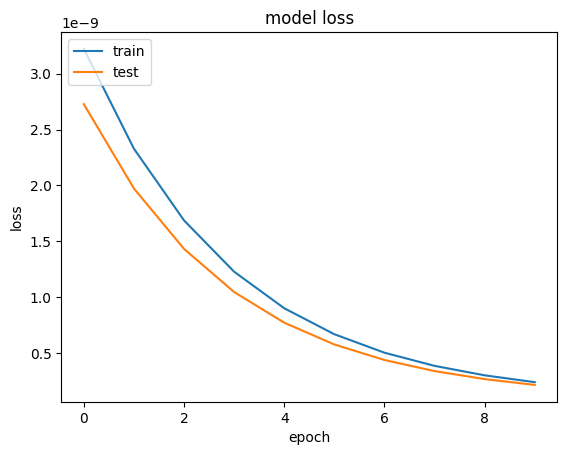

In [102]:
# import some basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

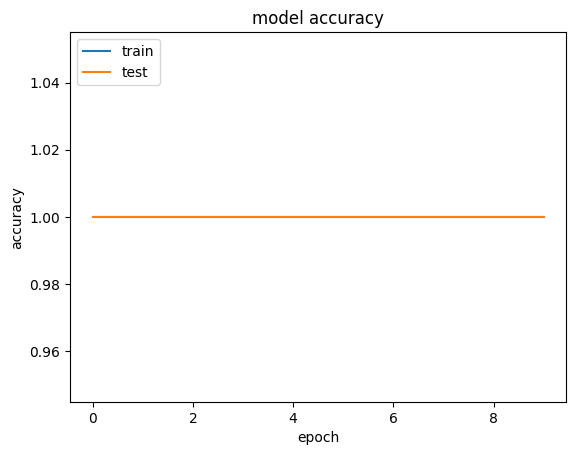

In [103]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()